In [2]:
# Libraries needed for appropiate working of the functions developed.

import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from os import listdir, path
%matplotlib inline

imagesnames = sorted(listdir('images'))   

print(sorted(imagesnames))

['blurry_moon.png', 'ckt_board_saltpep_prob_pt05.png', 'contact_lens_original.png', 'darkPollen.jpg', 'face.png', 'g.jpg', 'jiraffe.jpg', 'lena.jpg', 'lightPollen.jpg', 'lowContrastPollen.jpg', 'pollen.jpg', 'poomesa.jpg', 'runway.jpg', 'spine.jpg', 'test_pattern_blurring_orig.png', 'tgle.jpg', 'university.png', 'z1.jpg', 'z2.jpg', 'z3.jpg', 'z4.jpg', 'z5.jpg', 'z6.jpg', 'z7.jpg', 'zzspine.jpg']


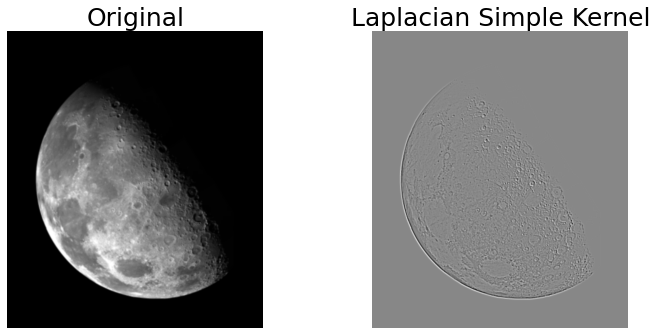

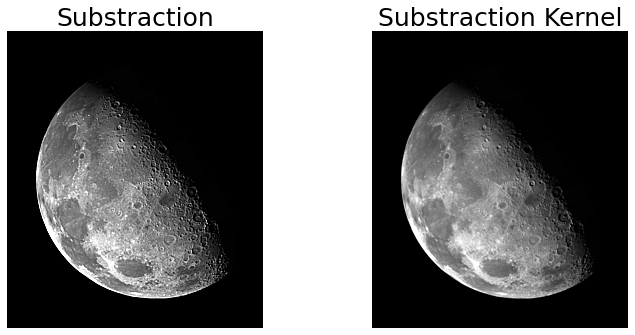

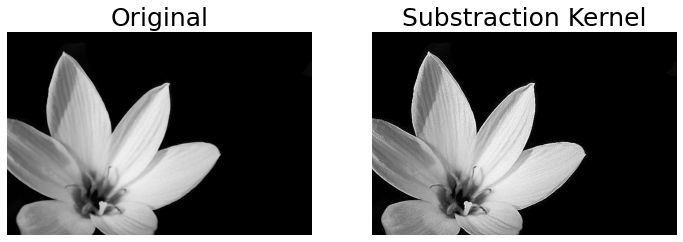

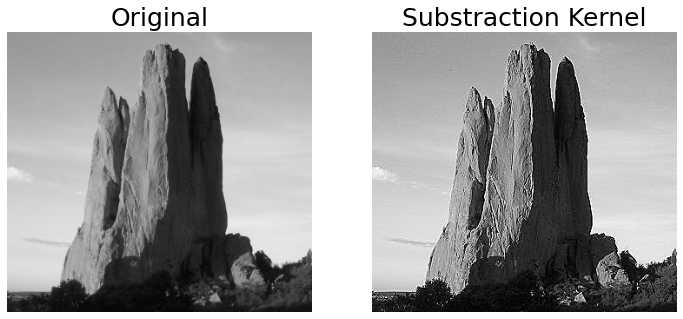

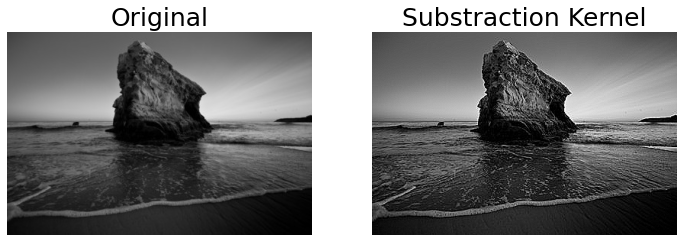

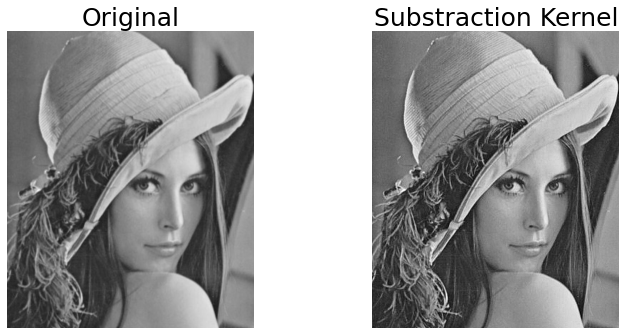

In [3]:
#Define Function

# Subtraction and laplacian
def Subtraction_Lap(img): 
    kernel_sub=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]],dtype=np.float32) 
    imgSubK = cv2.filter2D(img,-1,kernel_sub)  #Apply the kernel
    return imgSubK  

# Simple Laplacian
def Simple_Laplacian(img):         
    kernel_S = np.array([[0,1,0],[1,-4,1],[0,1,0]],dtype=np.float32)
    imgSL = cv2.filter2D(img,-1,kernel_S)  #Apply the kernel
    imgSubS=img-imgSL #Do the subtraction of the original image and the simple Laplacian
    imgSubS_K=Subtraction_Lap(img) 
    return [imgSL,imgSubS, imgSubS_K] 

# Variant Laplacian 
def Variant_Laplacian(img): 
    kernel_V = np.array([[1,1,1],[1,-8,1],[1,1,1]],dtype=np.float32) 
    imgVL = cv2.filter2D(img,-1,kernel_V)  
    imgSubV=img-imgVL 
    imgSubV_K=Subtraction_Lap(img)
    return [imgVL,imgSubV,imgSubV_K]  

#Load images
img = cv2.imread ('images/blurry_moon.png',cv2.IMREAD_GRAYSCALE).astype("float32") #Read original image
img_2 = cv2.imread ('images/g.jpg') #Read original image 2
img_5 = cv2.imread ('images/lena.jpg') #Read original image 3
img_3 = cv2.imread ('images/z4.jpg') #Read original image 3
img_4 = cv2.imread('images/z5.jpg')

#Call functions
LaplacianV, subtractionV,subtractionV_K= Variant_Laplacian(img)
LaplacianV_2, subtractionV_2, subtractionV_K_2= Variant_Laplacian(img_2) 
LaplacianV_3,subtractionV_3, subtractionV_K_3= Variant_Laplacian(img_3) 
LaplacianV_4, subtractionV_4,subtractionV_K_4= Variant_Laplacian(img_4) 
LaplacianV_5, subtractionV_5, subtractionV_K_5= Variant_Laplacian(img_5) 


#Plotting
plt.figure(figsize=(12,12)); 
plt.subplot(2,2,1);plt.imshow(img, cmap='gray');plt.title("Original",fontsize=25);plt.axis('off')          
plt.subplot(2,2,2);plt.imshow(LaplacianV,cmap='gray');plt.title("Laplacian Simple Kernel",fontsize=25);plt.axis('off')           
plt.figure(figsize=(12,12)); 
plt.subplot(2,2,1); plt.imshow(subtractionV, cmap='gray', vmin=0, vmax=255);plt.title("Substraction",fontsize=25);plt.axis('off')          
plt.subplot(2,2,2); plt.imshow(subtractionV_K, cmap='gray', vmin=0, vmax=255);plt.title("Substraction Kernel",fontsize=25);plt.axis('off')          

plt.figure(figsize=(12,12)); 
plt.subplot(2,2,1);plt.imshow(img_2, cmap='gray');plt.title("Original",fontsize=25);plt.axis('off')           
plt.subplot(2,2,2); plt.imshow(subtractionV_K_2,cmap='gray', vmin=0, vmax=255);plt.title("Substraction Kernel",fontsize=25);plt.axis('off')          


plt.figure(figsize=(12,12)); 
plt.subplot(2,2,1);plt.imshow(img_3, cmap='gray');plt.title("Original",fontsize=25);plt.axis('off')           
plt.subplot(2,2,2); plt.imshow(subtractionV_K_3, cmap='gray', vmin=0, vmax=255);plt.title("Substraction Kernel",fontsize=25);plt.axis('off')  

plt.figure(figsize=(12,12)); 
plt.subplot(2,2,1);plt.imshow(img_4, cmap='gray');plt.title("Original",fontsize=25);plt.axis('off')           
plt.subplot(2,2,2); plt.imshow(subtractionV_K_4, cmap='gray', vmin=0, vmax=255);plt.title("Substraction Kernel",fontsize=25);plt.axis('off')  

plt.figure(figsize=(12,12)); 
plt.subplot(2,2,1);plt.imshow(img_5, cmap='gray');plt.title("Original",fontsize=25);plt.axis('off')           
plt.subplot(2,2,2); plt.imshow(subtractionV_K_5, cmap='gray', vmin=0, vmax=255);plt.title("Substraction Kernel",fontsize=25);plt.axis('off')  

plt.show()